In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data-compiled-from-uci/UCI_Heart_Disease_Dataset_Combined.csv


In [36]:
df=pd.read_csv("/kaggle/input/heart-disease-data-compiled-from-uci/UCI_Heart_Disease_Dataset_Combined.csv")

In [37]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0


In [38]:
df.shape

(2943, 11)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   int64  
 1   Sex             2943 non-null   int64  
 2   ChestPainType   2943 non-null   int64  
 3   RestingBP       2943 non-null   int64  
 4   Cholesterol     2943 non-null   int64  
 5   FastingBS       2943 non-null   int64  
 6   RestingECG      2943 non-null   int64  
 7   MaxHR           2943 non-null   int64  
 8   ExerciseAngina  2943 non-null   int64  
 9   Oldpeak         2943 non-null   float64
 10  HeartDisease    2943 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 253.0 KB


In [40]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease'],
      dtype='object')

In [41]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0


In [42]:
duplicate_rows_df = df[df.duplicated()]
print("\nDuplicate Rows except the first occurrence based on all columns are:")
print(duplicate_rows_df)


Duplicate Rows except the first occurrence based on all columns are:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
1933   34    0              1        118          210          0           1   
1949   50    0              1        120          244          0           1   
1961   46    1              0        120          249          0           0   
1973   55    1              0        140          217          0           1   
1979   66    0              2        146          278          0           0   
...   ...  ...            ...        ...          ...        ...         ...   
2938   59    1              1        140          221          0           1   
2939   60    1              0        125          258          0           0   
2940   47    1              0        110          275          0           0   
2941   50    0              0        110          254          0           0   
2942   54    1              0        120          

In [43]:
df = df.drop_duplicates()
print("\nDataFrame after removing duplicates:")
print(df)


DataFrame after removing duplicates:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0      40    1              1        140          289          0           0   
1      49    0              2        160          180          0           0   
2      37    1              1        130          283          0           1   
3      48    0              3        138          214          0           0   
4      54    1              2        150          195          0           0   
...   ...  ...            ...        ...          ...        ...         ...   
2641   68    0              2        120          211          0           0   
2651   44    0              2        108          141          0           1   
2657   52    1              0        128          255          0           1   
2761   59    1              3        160          273          0           0   
2796   54    1              0        120          188          0           1   

 

(array([ 968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1252.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

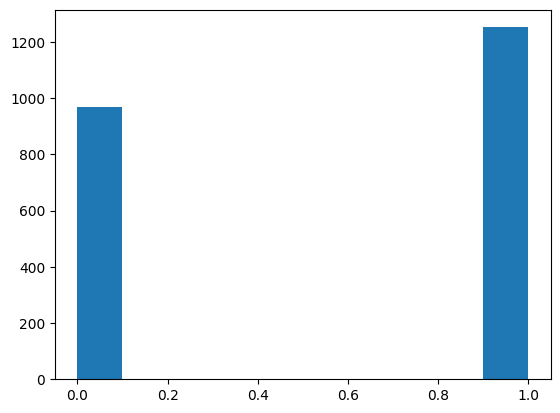

In [44]:
import matplotlib.pyplot as plt 
plt.hist(df["HeartDisease"])

In [45]:
df = pd.get_dummies(df, columns=['ChestPainType'])
df.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3
0,40,1,140,289,0,0,172,0,0.0,0,False,True,False,False
1,49,0,160,180,0,0,156,0,1.0,1,False,False,True,False
2,37,1,130,283,0,1,98,0,0.0,0,False,True,False,False
3,48,0,138,214,0,0,108,1,1.5,1,False,False,False,True
4,54,1,150,195,0,0,122,0,0.0,0,False,False,True,False


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
#     'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'GradientBoost':GradientBoostingClassifier(),
    'ExtraTrees':ExtraTreesClassifier()
}

# Train and test each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions)
    test_recall = recall_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions)
    print(f'{name} test Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}')
    
    # val_predictions = clf.predict(X_val)
    # val_accuracy = accuracy_score(y_val, val_predictions)
    # val_precision = precision_score(y_val, val_predictions)
    # val_recall = recall_score(y_val, val_predictions)
    # val_f1 = f1_score(y_val, val_predictions)
    # print(f'{name} validation Accuracy: {val_accuracy}, Precision: {val_precision}, Recall: {val_recall}, F1 Score: {val_f1}')



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression test Accuracy: 0.7342342342342343, Precision: 0.75, Recall: 0.8244274809160306, F1 Score: 0.7854545454545455
Random Forest test Accuracy: 0.8198198198198198, Precision: 0.837037037037037, Recall: 0.8625954198473282, F1 Score: 0.849624060150376
XGBoost test Accuracy: 0.8063063063063063, Precision: 0.8333333333333334, Recall: 0.8396946564885496, F1 Score: 0.8365019011406843
[LightGBM] [Info] Number of positive: 992, number of negative: 784
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 1776, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558559 -> initscore=0.235314
[LightGBM] [Info] Start training from score 0.235314
LightGBM test Accuracy: 0.8018018018018018, Precision: 

In [47]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # adjust this according to your problem
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # adjust this according to your problem

# Define the checkpoint callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_model.keras", save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[checkpoint_cb])

# Evaluate the model on the train set
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('\nTrain accuracy:', train_acc)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5353 - loss: 1.6042 - val_accuracy: 0.5766 - val_loss: 0.6678
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5863 - loss: 0.6545 - val_accuracy: 0.5586 - val_loss: 0.7522
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5760 - loss: 0.6888 - val_accuracy: 0.5856 - val_loss: 0.6688
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6090 - loss: 0.6536 - val_accuracy: 0.6441 - val_loss: 0.6097
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6125 - loss: 0.6373 - val_accuracy: 0.6802 - val_loss: 0.5940
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 0.6170 - val_accuracy: 0.6081 - val_loss: 0.6761
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6383 - loss: 0.6272 - val_accuracy: 0.6577 - val_loss: 0.6116
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5808 - loss: 0.6449 - val_accuracy: 0.6937 - val_loss: 0.6279
Epo

In [48]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
X_train=X_train.astype('int')
X_test=X_test.astype('int')
X_val=X_val.astype('int')
def objective(trial):
    param = {
        'iterations' : trial.suggest_int('iterations', 50, 300),
        'depth' : trial.suggest_int('depth', 4, 10),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'random_strength' : trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature' : trial.suggest_float('bagging_temperature', 0.01, 100.00, log=True),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait' : trial.suggest_int('od_wait', 10, 50)
    }
    model = CatBoostClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)
    preds = model.predict(X_test)
    accuracy = f1_score(y_test, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))

# Now let's use the model with the best parameters on the validation set
val_preds = best_model.predict(X_val)

# Check the accuracy and F1 score of the best model on the validation set
print("Validation Accuracy: %f" % accuracy_score(y_val, val_preds))
print("Validation F1 Score: %f" % f1_score(y_val, val_preds, average='weighted'))


[I 2024-04-02 05:45:51,315] A new study created in memory with name: no-name-a5460355-7484-4b9d-977a-b5569e1b486e
[I 2024-04-02 05:45:51,472] Trial 0 finished with value: 0.7851496251496252 and parameters: {'iterations': 59, 'depth': 7, 'learning_rate': 0.030741693620160732, 'random_strength': 25, 'bagging_temperature': 0.03283609827831237, 'od_type': 'IncToDec', 'od_wait': 48}. Best is trial 0 with value: 0.7851496251496252.
[I 2024-04-02 05:45:52,245] Trial 1 finished with value: 0.8325398336824732 and parameters: {'iterations': 256, 'depth': 9, 'learning_rate': 0.2560118518698934, 'random_strength': 23, 'bagging_temperature': 0.35904735651483966, 'od_type': 'IncToDec', 'od_wait': 35}. Best is trial 1 with value: 0.8325398336824732.
[I 2024-04-02 05:45:52,661] Trial 2 finished with value: 0.8044843469837604 and parameters: {'iterations': 280, 'depth': 4, 'learning_rate': 0.016252691919071225, 'random_strength': 79, 'bagging_temperature': 0.026918109075970673, 'od_type': 'IncToDec', '

Model Accuracy: 0.869369
Model F1 Score: 0.869257
Validation Accuracy: 0.855856
Validation F1 Score: 0.855856


In [49]:
best_model.save_model("CB",format="cbm")

In [50]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-5, 100,log=True),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        # 'penalty': trial.suggest_categorical('penalty', ['l2','none']),
        'solver': trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 50, 200),
        'tol': trial.suggest_float('tol', 1e-5, 1e-1),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'warm_start': trial.suggest_categorical('warm_start', [True, False]),
        'l1_ratio': trial.suggest_float('l1_ratio', 0, 1)
    }
    model = LogisticRegression(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = f1_score(y_test, preds, average='weighted')
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))

# Now let's use the model with the best parameters on the validation set
val_preds = best_model.predict(X_val)

# Check the accuracy and F1 score of the best model on the validation set
print("Validation Accuracy: %f" % accuracy_score(y_val, val_preds))
print("Validation F1 Score: %f" % f1_score(y_val, val_preds, average='weighted'))


[I 2024-04-02 06:01:16,935] A new study created in memory with name: no-name-9420fc36-0ad4-4fce-8229-0dbeee16b305
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[I 2024-04-02 06:01:16,963] Trial 0 finished with value: 0.6111282988119751 and parameters: {'C': 0.0014051314865458657, 'fit_intercept': False, 'solver': 'sag', 'max_iter': 79, 'tol': 0.06285941307876945, 'class_weight': 'balanced', 'warm_start': False, 'l1_ratio': 0.5324541754526508}. Best is trial 0 with value: 0.6111282988119751.
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[I 2024-04-02 06:01:17,076] Trial 1 finished with value: 0.7691765275082738 and parameters: {'C': 30.1677613479267, 'fit_intercept': True, 'solver': 'newton-cg', 'max_iter'

Model Accuracy: 0.801802
Model F1 Score: 0.802853
Validation Accuracy: 0.765766
Validation F1 Score: 0.766848


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [51]:
import pickle

pickle.dump(best_model, open("LR", 'wb'))

In [52]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1,log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
    }
    model = GradientBoostingClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = f1_score(y_test, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))

# Now let's use the model with the best parameters on the validation set
val_preds = best_model.predict(X_val)

# Check the accuracy and F1 score of the best model on the validation set
print("Validation Accuracy: %f" % accuracy_score(y_val, val_preds))
print("Validation F1 Score: %f" % f1_score(y_val, val_preds, average='weighted'))


[I 2024-04-02 06:04:49,247] A new study created in memory with name: no-name-d9395e85-4693-4abe-914f-e1b9b0b7c40e
[I 2024-04-02 06:04:49,833] Trial 0 finished with value: 0.8148130633004671 and parameters: {'n_estimators': 132, 'max_depth': 4, 'learning_rate': 0.021956433986196188, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8148130633004671.
[I 2024-04-02 06:04:50,583] Trial 1 finished with value: 0.7958806390033156 and parameters: {'n_estimators': 70, 'max_depth': 8, 'learning_rate': 0.05005908388181817, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8148130633004671.
[I 2024-04-02 06:04:51,737] Trial 2 finished with value: 0.8509470997296442 and parameters: {'n_estimators': 163, 'max_depth': 6, 'learning_rate': 0.018516460319209636, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.8509470997296442.
[I 2024-04-02 06:04:51,907] Trial 3 finished with value: 0.767182448060619 and parameters: {'

Model Accuracy: 0.860360
Model F1 Score: 0.859981
Validation Accuracy: 0.801802
Validation F1 Score: 0.802082


In [53]:
pickle.dump(best_model, open("GB", 'wb'))

In [54]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_int('max_features', 1,1500),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
    }
    model = RandomForestClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-04-02 06:23:40,726] A new study created in memory with name: no-name-3d9f0f9d-9ce7-45a5-b993-222fff9d2e00
[I 2024-04-02 06:23:47,743] Trial 0 finished with value: 0.7524326798760307 and parameters: {'n_estimators': 707, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1034, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7524326798760307.
[I 2024-04-02 06:23:57,578] Trial 1 finished with value: 0.7747747747747747 and parameters: {'n_estimators': 1398, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 464, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 1 with value: 0.7747747747747747.
[I 2024-04-02 06:24:05,431] Trial 2 finished with value: 0.6684496379196839 and parameters: {'n_estimators': 828, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 1209, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 1 with value: 0.7747747747747747.
[I 2024-04-02 

Model Accuracy: 0.833333
Model F1 Score: 0.832169


In [55]:
pickle.dump(best_model, open("RF", 'wb'))

In [56]:
from tabnanny import verbose
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 128),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0,log=True),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-5, 1,log=True),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10,log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10,log=True)
    }
    model = LGBMClassifier(**param,verbose=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds, average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-04-02 06:32:12,158] A new study created in memory with name: no-name-97e5947b-0f21-4c88-a50a-82e8fbff323f
/tmp/ipykernel_34/388030165.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1, 0.1),
/tmp/ipykernel_34/388030165.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1),
[I 2024-04-02 06:32:12,326] Trial 0 finished with value: 0.42711942711942713 and parameters: {'num_leaves': 118, 'max_depth': 79, 'learning_rate': 1.5695164628158915e-06, 'n_estimators': 264, 'min_child_samples': 78, 'min_child_weight

[LightGBM] [Info] Number of positive: 992, number of negative: 784
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 1776, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558559 -> initscore=0.235314
[LightGBM] [Info] Start training from score 0.235314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [57]:
pickle.dump(best_model, open("LGBM", 'wb'))

In [58]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
    }
    model = ExtraTreesClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds, average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = ExtraTreesClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-04-02 06:40:33,697] A new study created in memory with name: no-name-f873f0d3-9df4-41dc-8fd0-f84458ca436e
[I 2024-04-02 06:40:37,684] Trial 0 finished with value: 0.8200743962047155 and parameters: {'n_estimators': 1273, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.8200743962047155.
[I 2024-04-02 06:40:41,229] Trial 1 finished with value: 0.8338679303851168 and parameters: {'n_estimators': 1085, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 1 with value: 0.8338679303851168.
[I 2024-04-02 06:40:44,919] Trial 2 finished with value: 0.8380669565842438 and parameters: {'n_estimators': 1135, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 2 with value: 0.8380669565842438.
[I 2024-0

Model Accuracy: 0.806306
Model F1 Score: 0.803979


In [59]:
pickle.dump(best_model, open("ET", 'wb'))

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0,log=True),
        'gamma': trial.suggest_float('gamma', 0.1, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1, step=0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10,log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10,log=True)
    }
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


In [71]:
pickle.dump(best_model, open("XGB", 'wb'))

In [ ]:
import pickle

In [72]:

lr=pickle.load(open('LR', 'rb'))
gb=pickle.load(open("GB", 'rb'))
rf=pickle.load(open("RF", 'rb'))
lgbm=pickle.load(open("LGBM", 'rb'))
et=pickle.load(open("ET", 'rb'))
xgb=pickle.load(open("XGB", 'rb'))


In [73]:
cb=CatBoostClassifier()
cb.load_model("CB")


In [74]:
p1=cb.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=cb.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=lr.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=lr.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=gb.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=gb.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=rf.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=rf.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=lgbm.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=lgbm.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=et.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=et.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=xgb.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=xgb.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

0.8558558558558559


0.869481880258512


0.7646839416736325


0.8007504396232122


0.8015217677784167


0.8607401118837822


0.8337415991457823


0.8344981412639405


0.8468468468468469


0.8337865851516111


0.8420184890773126


0.8086339665287035


0.8476590226590227


0.8034218126172148




In [75]:
from scipy.optimize import minimize
from sklearn.metrics import f1_score
import numpy as np

preds_cb = cb.predict(X_val)
preds_lr = lr.predict(X_val)
preds_gb = gb.predict(X_val)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)

# Stack predictions
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

def loss_func(weights):
    
    final_prediction = np.average(preds, axis=0, weights=weights)
    final_prediction = [1 if prob > 0.5 else 0 for prob in final_prediction]
    return 1 - f1_score(y_val, final_prediction, average='weighted')

# The algorithm needs a starting value, let's start with equal weights
starting_values = [1/7,1/7,1/7,1/7,1/7,1/7,1/7]

# Our weights are bound between 0 and 1
bounds = [(0, 1)]*7

# We want our weights to sum to 1
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

# We use 'SLSQP' as our solver, SLSQP stands for Sequential Least Squares Programming
res = minimize(loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('Ensemble Weights: {weights}'.format(weights=res['x']))

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Get the predictions from each model on the test set
preds_cb = cb.predict(X_test)
preds_lr = lr.predict(X_test)
preds_gb = gb.predict(X_test)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)

# Stack the predictions together
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=res['x'])

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

# Print the classification report
print(classification_report(y_test, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_test, final_preds))
print("Recall: %f" % recall_score(y_test, final_preds))
print("F1 Score: %f" % f1_score(y_test, final_preds))



Ensemble Weights: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
              precision    recall  f1-score   support

         0.0       0.48      0.47      0.48        91
         1.0       0.64      0.65      0.64       131

    accuracy                           0.58       222
   macro avg       0.56      0.56      0.56       222
weighted avg       0.58      0.58      0.58       222

Precision: 0.639098
Recall: 0.648855
F1 Score: 0.643939


In [76]:
preds_cb = cb.predict(X_val)
preds_lr = lr.predict(X_val)
preds_gb = gb.predict(X_val)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)
# Stack the predictions together
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=res['x'])

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

# Print the classification report
print(classification_report(y_val, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_val, final_preds))
print("Recall: %f" % recall_score(y_val, final_preds))
print("F1 Score: %f" % f1_score(y_val, final_preds))


              precision    recall  f1-score   support

           0       0.81      0.80      0.80        93
           1       0.85      0.87      0.86       129

    accuracy                           0.84       222
   macro avg       0.83      0.83      0.83       222
weighted avg       0.84      0.84      0.84       222

Precision: 0.854962
Recall: 0.868217
F1 Score: 0.861538


In [77]:
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

preds_cb = cb.predict(X_val)
preds_lr = lr.predict(X_val)
preds_gb = gb.predict(X_val)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)
# Stack predictions
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

def loss_func(weights):
    
    final_prediction = np.average(preds, axis=0, weights=weights)
    # Convert probabilities to class labels
    final_prediction = [1 if prob > 0.5 else 0 for prob in final_prediction]
    return 1 - f1_score(y_val, final_prediction, average='weighted')

# Our weights are bound between 0 and 1
bounds = [(0, 1)]*7

# We want our weights to sum to 1
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

# Number of random starting points
num_starts = 10

best_score = np.inf
best_weights = None

# Perform optimization with several randomly chosen starting points
for _ in range(num_starts):
    # Randomly choose starting weights
    values = np.random.rand(7)
    starting_values = values / np.sum(values)

    res = minimize(loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

    if res.fun < best_score:
        best_score = res.fun
        best_weights = res.x

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=best_weights)

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

print('Best Ensemble Weights: {weights}'.format(weights=best_weights))

print(classification_report(y_test, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_test, final_preds))
print("Recall: %f" % recall_score(y_test, final_preds))
print("F1 Score: %f" % f1_score(y_test, final_preds))


Best Ensemble Weights: [0.2842193  0.11092116 0.20387251 0.28665253 0.09220049 0.01538497
 0.00674904]
              precision    recall  f1-score   support

         0.0       0.43      0.43      0.43        91
         1.0       0.60      0.60      0.60       131

    accuracy                           0.53       222
   macro avg       0.52      0.52      0.52       222
weighted avg       0.53      0.53      0.53       222

Precision: 0.603053
Recall: 0.603053
F1 Score: 0.603053


In [78]:
preds_cb = cb.predict(X_val)
preds_lr = lr.predict(X_val)
preds_gb = gb.predict(X_val)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)
# Stack the predictions together
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=best_weights)

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

# Print the classification report
print(classification_report(y_val, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_val, final_preds))
print("Recall: %f" % recall_score(y_val, final_preds))
print("F1 Score: %f" % f1_score(y_val, final_preds))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82        93
           1       0.86      0.88      0.87       129

    accuracy                           0.85       222
   macro avg       0.84      0.84      0.84       222
weighted avg       0.85      0.85      0.85       222

Precision: 0.862595
Recall: 0.875969
F1 Score: 0.869231


In [79]:
from sklearn.metrics import confusion_matrix
import numpy as np

models = [cb, lr, gb,rf,lgbm,et,xgb]
model_names = ['cb', 'lr', 'gb', 'rf', 'lgbm','et','xgb']

# Get the predictions from each model on the validation set
preds = [model.predict(X_val) for model in models]

# Calculate Disagreement Measure and Correlation of Errors
for i in range(len(models)):
    for j in range(i+1, len(models)):
        # Disagreement Measure
        disagree = np.mean(preds[i] != preds[j])
        print(f'Disagreement Measure between {model_names[i]} and {model_names[j]}: {disagree}')
        
        # Correlation of Errors
        errors_i = preds[i] != y_val
        errors_j = preds[j] != y_val
        correlation = np.corrcoef(errors_i, errors_j)[0, 1]
        print(f'Correlation of Errors between {model_names[i]} and {model_names[j]}: {correlation}')


Disagreement Measure between cb and lr: 0.14414414414414414
Correlation of Errors between cb and lr: 0.5603411444311519
Disagreement Measure between cb and gb: 0.09009009009009009
Correlation of Errors between cb and gb: 0.6967489613206035
Disagreement Measure between cb and rf: 0.03153153153153153
Correlation of Errors between cb and rf: 0.8832505754016562
Disagreement Measure between cb and lgbm: 0.04504504504504504
Correlation of Errors between cb and lgbm: 0.8225794275109579
Disagreement Measure between cb and et: 0.04054054054054054
Correlation of Errors between cb and et: 0.8430274536955765
Disagreement Measure between cb and xgb: 0.036036036036036036
Correlation of Errors between cb and xgb: 0.8581903153634214
Disagreement Measure between lr and gb: 0.16216216216216217
Correlation of Errors between lr and gb: 0.5254334065751518
Disagreement Measure between lr and rf: 0.13063063063063063
Correlation of Errors between lr and rf: 0.6088339125177527
Disagreement Measure between lr a

# WEBAPP
### Store this in html file

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Heart Disease Prediction</title>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>
</head>
<body>
    <h1>Heart Disease Prediction</h1>
    <form id="predict-form">
        <label for="age">Age:</label><br>
        <input type="number" id="age" name="age"><br>
        <label for="sex">Sex:</label><br>
        <select id="sex" name="sex">
            <option value="Male">Male</option>
            <option value="Female">Female</option>
        </select><br>
        <label for="chestPainType">Chest Pain Type:</label><br>
        <select id="chestPainType" name="chestPainType">
            <option value="Typical angina">Typical angina</option>
            <option value="Atypical angina">Atypical angina</option>
            <option value="Non-anginal pain">Non-anginal pain</option>
            <option value="Asymptomatic">Asymptomatic</option>
        </select><br>
        <label for="restingBP">Resting Blood Pressure:</label><br>
        <input type="number" id="restingBP" name="restingBP"><br>
        <label for="cholesterol">Cholesterol:</label><br>
        <input type="number" id="cholesterol" name="cholesterol"><br>
        <label for="fastingBS">Fasting Blood Sugar:</label><br>
        <input type="number" id="fastingBS" name="fastingBS"><br>
        <label for="maxHR">Maximum Heart Rate:</label><br>
        <input type="number" id="maxHR" name="maxHR"><br>
        <label for="exerciseAngina">Exercise Induced Angina:</label><br>
        <select id="exerciseAngina" name="exerciseAngina">
            <option value="Yes">Yes</option>
            <option value="No">No</option>
        </select><br>
        <input type="submit" value="Predict">
    </form>
    <p id="prediction"></p>

    <script>
        $("#predict-form").submit(function(event) {
            event.preventDefault();
            var data = {
                'Age': parseInt($("#age").val()),
                'Sex': $("#sex").val(),
                'ChestPainType': $("#chestPainType").val(),
                'RestingBP': parseInt($("#restingBP").val()),
                'Cholesterol': parseInt($("#cholesterol").val()),
                'FastingBS': parseInt($("#fastingBS").val()),
                'MaxHR': parseInt($("#maxHR").val()),
                'ExerciseAngina': $("#exerciseAngina").val()
            };
            $.ajax({
                url: '/predict',
                method: 'POST',
                contentType: 'application/json',
                data: JSON.stringify(data),
                success: function(response) {
                    $("#prediction").text('Prediction: ' + response.prediction);
                },
                error: function(response) {
                    $("#prediction").text('Error: ' + response.responseJSON.error);
                }
            });
        });
        
    </script>
</body>
</html>


In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load the models
cb1 = pickle.load(open('cbheart1.pkl', 'rb'))
cb2 = pickle.load(open('cbheart2.pkl', 'rb'))
lr = pickle.load(open('LRHD_0.8F1_0.75Acc.pkl', 'rb'))
gb = pickle.load(open('GradBoostHeartDisease_0.82_0.82.pkl', 'rb'))

# Define the ensemble weights
weights = np.array([0.25014892, 0.24990093, 0.24985107, 0.25009908])

app = Flask(__name__)
def validate_input(data):
    # Convert input data to the format expected by the models
    data['Sex'] = 1 if data['Sex'].lower() == 'male' else 0
    chest_pain_types = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
    for i, chest_pain_type in enumerate(chest_pain_types):
        data['ChestPainType_' + str(i)] = data['ChestPainType'].lower() == chest_pain_type
    del data['ChestPainType']
    data['FastingBS'] = 1 if data['FastingBS'] > 120 else 0
    data['ExerciseAngina'] = 1 if data['ExerciseAngina'].lower() == 'yes' else 0

    # Convert the data to a flat list of features
    features = [data['Age'], data['Sex'], data['RestingBP'], data['Cholesterol'], data['MaxHR'], data['ExerciseAngina']] + [data['ChestPainType_' + str(i)] for i in range(4)]

    # Define the expected data types for each feature
    expected_types = [int, int, int, int, int, int, bool, bool, bool, bool]
    constraints = [(20,80), (0,1), (0,200), (0,603), (60,202), (0,1), (False,True), (False,True), (False,True), (False,True)]
    
    # Check if the number of features is correct
    if len(features) != len(expected_types):
        return False, "Incorrect number of features. Expected {} but got {}.".format(len(expected_types), len(features)), None
    
    # Check the data type and constraints of each feature
    for i in range(len(features)):
        if type(features[i]) != expected_types[i]:
            return False, "Incorrect data type for feature {}. Expected {} but got {}.".format(i, expected_types[i].__name__, type(features[i]).__name__), None
        if features[i] < constraints[i][0] or features[i] > constraints[i][1]:
            return False, "Feature {} out of bounds. Expected between {} and {} but got {}.".format(i, constraints[i][0], constraints[i][1], features[i]), None
    # If all checks pass, return True and the features
    return True, "Input is valid.", features

        
@app.route('/',methods=["GET"])
def home():
    return app.send_static_file('index.html')


@app.route('/predict', methods=['POST'])
def predict():
    # Get the data from the POST request
    data = request.get_json(force=True)
    is_valid, message, features = validate_input(data)
    if not is_valid:
        print(message)
        return jsonify({'error': message}),400
    # Make prediction using the models
    prediction1 = cb1.predict_proba([np.array(features)])
    prediction2 = cb2.predict_proba([np.array(features)])
    prediction3 = lr.predict_proba([np.array(features)])
    prediction4 = gb.predict_proba([np.array(features)])

    # Compute the ensemble prediction
    ensemble_prediction = np.argmax(np.average(np.array([prediction1, prediction2, prediction3, prediction4]), axis=0, weights=weights))

    # Send back to the client
    output = {'prediction': int(ensemble_prediction)}
    return jsonify(output)

if __name__ == '__main__':
    app.run(port=5000, debug=True)
